- [x] Construa duas arquiteturas de CNN(com profundidades diferentes);
- [ ] Escolha ate tres modelos pre-treinados para aplicar aprendizagem por transferencia (voce pode usar o mesmo modelo com camadas diferentes)*;
- [ ] Utilize as CNN como seus modelos propostos;
- [ ] Treine e avalie os outros modelos.

*Considere esses modelos como sendo metodos existentes de classificacao

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
from keras.applications import VGG19,ResNet50
import cv2
import numpy as np

In [ ]:
 (X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print(f'Imagem train shape: {X_train.shape}')
print(f'Training label shape: {y_train.shape}')
print(f'Imagem test shape: {X_test.shape}')
print(f'Test label shape: {y_test.shape}')

Imagem train shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Imagem test shape: (10000, 32, 32, 3)
Test label shape: (10000, 1)


In [ ]:
y_train = y_train.reshape(-1, )  # Changing to one dimesison array 
y_test = y_test.reshape(-1, )

In [ ]:
label_name = {0:'airplane', 1:'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

Showing some samples from the dataset 

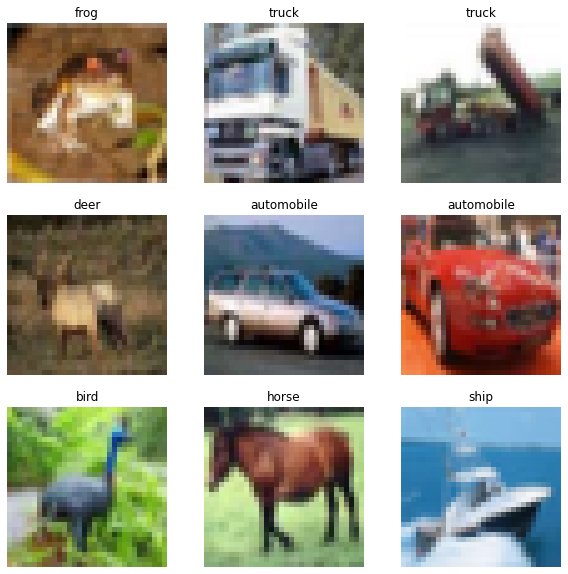

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i])
    plt.title(label_name.get(y_train[i]))
    plt.axis("off")

Normalizing the data to 0-255

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0 

> ## CNN 1 

In [ ]:
cnn_model_1 = Sequential([
                          Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                          MaxPooling2D((2, 2)),
                          Conv2D(32, kernel_size=(3, 3), activation='relu'),
                          MaxPooling2D((2, 2)),

                          Flatten(),
                          Dense(64),
                          Dense(10, activation='softmax')
])

In [ ]:
cnn_model_1.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
history = cnn_model_1.fit(X_train, y_train, epochs=10, 
                          validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 84s 54ms/step - loss: 1.6774 - accuracy: 0.3861 - val_loss: 1.2727 - val_accuracy: 0.5466
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1839 - accuracy: 0.5819 - val_loss: 1.1186 - val_accuracy: 0.6045
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.0664 - accuracy: 0.6254 - val_loss: 1.0333 - val_accuracy: 0.6408
Epoch 4/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9983 - accuracy: 0.6504 - val_loss: 1.0517 - val_accuracy: 0.6327
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.9604 - accuracy: 0.6674 - val_loss: 1.0060 - val_accuracy: 0.6524
Epoch 6/10
1563/1563 [==============================] - 79s 50ms/step - loss: 0.9375 - accuracy: 0.6744 - val_loss: 0.9762 - val_accuracy: 0.6622
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8872 - accuracy: 0.6914 - val_loss: 0.9489 -

313/313 - 4s - loss: 0.9228 - accuracy: 0.6817


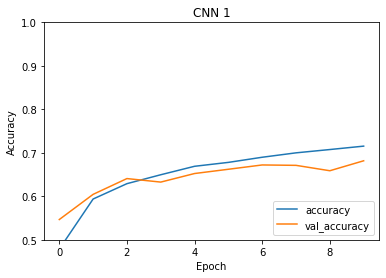

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('CNN 1')
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model_1.evaluate(X_test,  y_test, verbose=2)

In [ ]:
y_pred = cnn_model_1.predict(X_test)
y_pred[:5]

array([[3.9117630e-03, 2.0235369e-05, 3.7020997e-03, 5.8651018e-01,
        1.0133937e-03, 1.0185999e-01, 1.8713364e-02, 9.2709332e-04,
        2.7477765e-01, 8.5642086e-03],
       [6.5901172e-03, 9.9067027e-03, 1.1515947e-05, 1.1722731e-06,
        3.5553435e-07, 2.1878899e-08, 2.3337323e-08, 1.4470658e-06,
        9.8286760e-01, 6.2093523e-04],
       [1.3128866e-01, 4.9139343e-02, 2.3475105e-03, 2.7349328e-03,
        1.5354201e-03, 2.2531716e-04, 3.5934521e-05, 1.9879495e-03,
        7.9625142e-01, 1.4453522e-02],
       [3.6830428e-01, 1.1967601e-02, 7.0750802e-03, 8.0256996e-04,
        4.5397861e-05, 5.3173080e-06, 6.9299331e-06, 1.1722692e-04,
        6.1156249e-01, 1.1304231e-04],
       [5.1479055e-05, 2.0372270e-04, 3.3086400e-02, 6.4249218e-02,
        6.4745688e-01, 9.7244903e-03, 2.4489486e-01, 2.9493243e-04,
        2.3235649e-05, 1.4759354e-05]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

CNN 2

In [ ]:
cnn_model_2 = Sequential([
                          Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
                          MaxPooling2D((2, 2)),
                          Dropout(0.5),
                          Conv2D(32, kernel_size=(3, 3), activation='relu'),
                          MaxPooling2D((2, 2)),
                          Dropout(0.5),
                          Conv2D(32, kernel_size=(3, 3), activation='relu'),
                          MaxPooling2D((2, 2)),

                          Flatten(),
                          Dense(64),
                          Dense(10, activation='softmax')
])

In [ ]:
cnn_model_2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
history = cnn_model_2.fit(X_train, y_train, epochs=10, 
                          validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4098 - accuracy: 0.4898 - val_loss: 1.3204 - val_accuracy: 0.5434
Epoch 2/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.3364 - accuracy: 0.5184 - val_loss: 1.2498 - val_accuracy: 0.5670
Epoch 3/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.2840 - accuracy: 0.5381 - val_loss: 1.1456 - val_accuracy: 0.6038
Epoch 4/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.2480 - accuracy: 0.5542 - val_loss: 1.1651 - val_accuracy: 0.6003
Epoch 5/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.2150 - accuracy: 0.5677 - val_loss: 1.1687 - val_accuracy: 0.5944
Epoch 6/10
1563/1563 [==============================] - 92s 59ms/step - loss: 1.1965 - accuracy: 0.5745 - val_loss: 1.1893 - val_accuracy: 0.5855
Epoch 7/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.1793 - accuracy: 0.5806 - val_loss: 1.1244 -

313/313 - 4s - loss: 1.0630 - accuracy: 0.6293


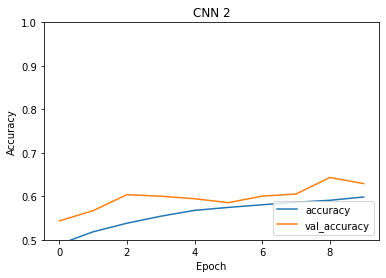

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('CNN 2')
plt.legend(loc='lower right')

test_loss, test_acc = cnn_model_2.evaluate(X_test,  y_test, verbose=2)

In [ ]:
y_pred = cnn_model_2.predict(X_test)
y_pred[:5]

array([[4.57984954e-03, 1.12321519e-03, 1.60850622e-02, 6.14212573e-01,
        3.89504731e-02, 1.08097821e-01, 1.64470091e-01, 2.25294735e-02,
        1.82921682e-02, 1.16592795e-02],
       [3.92133072e-02, 3.47841531e-01, 3.03554087e-04, 1.28982749e-04,
        1.63348130e-04, 8.09647008e-06, 1.11315385e-04, 2.08698330e-05,
        5.65497875e-01, 4.67110500e-02],
       [6.62459731e-02, 3.61743838e-01, 2.35401746e-02, 1.57318190e-02,
        8.32890347e-03, 3.38260620e-03, 2.22738963e-02, 7.84509000e-04,
        4.36011076e-01, 6.19572401e-02],
       [3.68190616e-01, 8.91228765e-02, 1.49935409e-02, 6.66866545e-03,
        4.54292540e-03, 7.29581632e-04, 3.97765590e-03, 7.57801405e-04,
        5.02493322e-01, 8.52304697e-03],
       [2.09392761e-04, 5.63816575e-04, 7.35978633e-02, 1.85008049e-02,
        1.20265298e-01, 7.07693445e-03, 7.77193248e-01, 1.86637312e-03,
        4.86999954e-04, 2.39268178e-04]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[5:15]

[6, 1, 6, 3, 1, 4, 9, 6, 7, 9]

In [ ]:
y_test[5:15]

array([6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)


## transfer learning


In [ ]:
base_model = tf.keras.applications.ResNet50V2(
    include_top=False, weights='imagenet', input_shape=(32, 32, 3), classes=10, 
    classifier_activation='softmax')

94674944/94668760 [==============================] - 2s 0us/step


In [ ]:
model = Sequential([
  base_model,
  Flatten(),
  Dense(64),
  Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 1, 1, 2048)        23564800  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                131136    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 23,696,586
Trainable params: 23,651,146
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=85,
          validation_data=(X_test, y_test))

Epoch 1/5
589/589 [==============================] - 3291s 6s/step - loss: 2.0635 - accuracy: 0.3162 - val_loss: 2.5863 - val_accuracy: 0.1369
Epoch 2/5
589/589 [==============================] - 3227s 5s/step - loss: 2.1472 - accuracy: 0.2530 - val_loss: 2.4614 - val_accuracy: 0.2425
Epoch 3/5
406/589 [===================>..........] - ETA: 16:40 - loss: 1.7883 - accuracy: 0.3245

In [ ]:
y_pred = cnn_model_2.predict(X_test)
y_pred[:5]